# Module Two Problem Set: Interaction Terms and Qualitative Predictors

In this notebook, you have been given a set of steps that will show you how to create multiple regression models that include interaction terms and qualitative predictors in R. It is very important to run the steps in order. Some steps depend on the outputs of earlier steps. Once you have run all the steps, you will be asked to create your own regression models to help you answer the questions in the Module Two Problem Set. You are expected to write the R script yourself to answer these questions.

Reminder: If you have not already reviewed the Problem Set Report template for your Module Two Problem Set, be sure to do so now. That will give you an idea of the questions you will need to answer with the outputs of this script. You should use the code you are given as reference when writing your own scripts.

### Step 1: Loading the Data Set
You are an analyst working for a car maker. You have access to a set of data that can be used to study the fuel economy of a car. Car makers are interested in studying factors that are associated with better fuel economy. This data set includes several important variables that are associated with fuel economy. You will use this data set to create models to predict fuel economy.

This block of R code will load the data set from **mtcars.csv** file. Here are the variables contained in the dataset. 

| <div style="text-align: left"> Variable </div>  |   <div style="text-align: left"> What does it represent? </div> |
| -- | --  |
| <div style="text-align: left"> mpg </div> | <div style="text-align: left"> Fuel economy in miles/(US) gallon </div> |
| <div style="text-align: left"> cyl </div> | <div style="text-align: left"> Number of cylinders in car's engine. Values are (4, 6, 8) </div> |
| <div style="text-align: left"> disp </div> | <div style="text-align: left"> Displacement (cu.in.) measures overall volume in the engine as a factor of cylinder circumfrance, depth and total number of cylinders. This metric is a good proxy for the total amount of power the engine can generate.</div> |
| <div style="text-align: left"> hp </div> | <div style="text-align: left"> Gross horsepower measures the theoretical output of an engine’s power output.</div> |
| <div style="text-align: left"> drat </div> | <div style="text-align: left"> Rear axle ratio indicates the number of turns of the drive shaft for every one rotation of the wheel axle. A vehicle with a high ratio would provide more torque. </div> |
| <div style="text-align: left"> wt </div> | <div style="text-align: left"> Weight of the car per 1,000 lbs. </div>|
| <div style="text-align: left"> qsec </div> | <div style="text-align: left"> Quarter mile time is a performance measure of acceleration of the car.</div>|
| <div style="text-align: left"> vs </div> | <div style="text-align: left"> Engine's cylinder configuration as V-shaped or straight. Configuration offers trade offs in power/torque, design usage in terms of space/size of engine and performance or center of gravity of vehicle. Values are (0 = V-shaped, 1 = straight) </div> |
| <div style="text-align: left"> am </div> | <div style="text-align: left"> Automatic or Manual transmission. Values are (0 = automatic, 1 = manual) </div> |
| <div style="text-align: left"> gear </div> | <div style="text-align: left"> Number of gears in the transmission.</div> |

Reference:
R data sets. (1974). <i>Motor trend car road tests<i> [Data file]. Retrieved from https://www.rdocumentation.org/packages/datasets/versions/3.6.2/topics/mtcars


Click the code section below and hit the **Run** button above.

In [1]:
# Loading mtcars data set from a mtcars.csv file
mtcars <- read.csv(file='mtcars.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
mtcars2 <- within(mtcars, {
   vs <- factor(vs)
   am <- factor(am)
   cyl  <- factor(cyl)
   gear <- factor(gear)
   carb <- factor(carb)
})


# Print the first six rows
print("head")
head(mtcars2, 6)

[1] "head"


car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


## Step 2: Subsetting Data and Correlation Matrix
In this step, you will subset the original data set to select some variables and create a new data set. You will then print the correlation matrix for these variables in the new data set. 

Click the block of code below and hit the **Run** button above.  

In [2]:
myvars <- c("mpg","wt","drat")
mtcars_subset <- mtcars2[myvars]

# Print the first six rows
print("head")
head(mtcars_subset, 6)

# Print the correlation matrix
print("cor")
corr_matrix <- cor(mtcars_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


mpg,wt,drat
<dbl>,<dbl>,<dbl>
21.0,2.620,3.90
21.0,2.875,3.90
22.8,2.320,3.85
21.4,3.215,3.08
18.7,3.440,3.15
18.1,3.460,2.76


[1] "cor"


,mpg,wt,drat
mpg,1.0000,-0.8677,0.6812
wt,-0.8677,1.0000,-0.7124
drat,0.6812,-0.7124,1.0000


## Step 3: Multiple Regression With Interaction Term
In this step, you will create a multiple regression model for fuel economy as the response variable, and weight and rear axle ratio as predictors. A numerically higher rear axle ratio sends more of the engine's available torque to the tires, thus increasing the fuel economy. We expect that the fuel economy and weight of the car are negatively correlated, meaning that as weight increases, the fuel economy decreases (or vice versa). However, the rate of decrease in fuel economy will be offset by a numerically higher rear axle ratio. This favors a multiple regression model in which the two predictor variables interact. 

The general form of this regression model is:

<br><br>
\begin{equation*}
\large E(y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\ {\beta}_2\ {x}_2\ +\ {\beta}_3\ {x}_1\ {x}_2
\end{equation*}
<br><br>


The prediction regression model is:

<br><br>
\begin{equation*}
\large \hat{y} = \hat{{\beta}_0} +\ \hat{{\beta}_1}\ {x}_1\ +\ \hat{{\beta}_2}\ {x}_2+\ \hat{{\beta}_3}\ {x}_1\ {x}_2
\end{equation*}
<br><br>


\begin{equation*}
\text{where } \hat{y} \text{ is the predicted value of the fuel economy,}\ {x}_1\ \text{is weight,}\ {x}_2\ \text{is rear axle ratio}
\end{equation*}

\begin{equation*}
\hat{{\beta}_0} \text{,} \hspace{0.25cm} \hat{{\beta}_1} \text{, } \hspace{0.25cm} \hat{{\beta}_2} \text{, } \hspace{0.25cm} \hat{{\beta}_3} \text{  } \text{ are estimates of}
\text{  } {\beta}_0\ \text{,} \hspace{0.25cm} {\beta}_1\ \text{,} \hspace{0.25cm} {\beta}_2\ \text{,} \hspace{0.25cm} {\beta}_3\ \text{ respectively  }
\end{equation*}
<br><br>


<br>


Click the block of code below and hit the **Run** button above.  

In [3]:
# Create the multiple regression model and print summary statistics. Note that this model includes the interaction term. 
model1 <- lm(mpg ~ wt + drat + wt:drat, data=mtcars_subset)
summary(model1)


Call:
lm(formula = mpg ~ wt + drat + wt:drat, data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8913 -1.8634 -0.3398  1.3247  6.4730 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    5.550     12.631   0.439   0.6637  
wt             3.884      3.798   1.023   0.3153  
drat           8.494      3.321   2.557   0.0162 *
wt:drat       -2.543      1.093  -2.327   0.0274 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.839 on 28 degrees of freedom
Multiple R-squared:  0.7996,	Adjusted R-squared:  0.7782 
F-statistic: 37.25 on 3 and 28 DF,  p-value: 6.567e-10


### Interpretation of Beta Estimates
From the output in previous step, the prediction model equation is:
<br><br>
\begin{equation*}
\large \hat{y} = 5.5500\ +\ 3.8840\ {x}_1\ +\ 8.4940\ {x}_2\ -\ 2.5430\ {x}_1\ {x}_2
\end{equation*}
<br><br>

\begin{equation*}
\text{where } \hat{y} \text{ is the predicted fuel efficiency,}\ {x}_1\ \text{is weight,}\ {x}_2\ \text{and rear axle ratio}  
\end{equation*}

<br>

**Interpret the estimated coefficient of rear axle ratio variable. **


* Let us assume there was no interaction present and the multiple regression model was 5.55 + 3.884 x1 + 8.494 x2. Then, the fuel economy of a car would increase on average by 8.494 for each unit increase in rear axle ratio (since 8.494 is the estimated coefficient for a rear axle ratio variable). 
<br><br>

* However, weight and rear axle ratio interact in the model in step 3, therefore the rate of change of average fuel economy with rear axle ratio depends on the weight of the car. The estimated coefficient for x2 is: 

 8.4940 x2 - 2.5430 (x1)(x2) = ( 8.4940 - 2.5430 x1 ) x2
 
 The estimated coefficient for x2 is ( 8.494 - 2.543 x1 )
 

* Suppose we have a car with weight 2.50. The estimated coeffficient for rear axle ratio can be calculated as:

 ( 8.494 - 2.543 x1 ) = 8.494 - 2.543 (2.50) = +2.1365 

 In other words, we estimate that the fuel economy of a car with weight 2,500lbs will increase by 2.1365 units for each unit  increase in rear axle ratio. Note that this is different than the 8.494 from the first bullet. This is because the multiple regression model has an interaction term between weight and rear axle ratio. 
<br><br>

* Suppose we now have a car with weight 2.32. If there were no interaction term included in the model, then the fuel economy of this car would increase on average by 8.494 for each unit increase in rear axle ratio. However, since we now have the interaction term in the model, the fuel economy of the car will increase by 8.494 - 2.543 (2.32) = 2.59 units for each unit increase in rear axle ratio. 
<br><br>

* Therefore, the rate of increase in fuel economy now varies due to the presence of an interaction term. 

## Step 4: Adding in a Qualitative Predictor
In this step, you will add a qualitative predictor into the multiple regression model from step 3. The transmission variable **am** is a qualitative variable with two levels; manual and automatic. Since this is a variable with two levels, we can use one dummy variable to represent it. R will create the dummy variable automatically and will also label it appropriately. 

The general form of this regression model is:
<br><br>
\begin{equation*}
\large E(y) = {\beta}_0\ +\ {\beta}_1\ {x}_1\ +\ {\beta}_2\ {x}_2\ +\ {\beta}_3\ {x}_1\ {x}_2\ +\ {\beta}_4\ {x}_3
\end{equation*}
<br><br>

The prediction regression model is:
<br><br>
\begin{equation*}
\large \hat{y} = \hat{{\beta}_0}\ +\ \hat{{\beta}_1}\ {x}_1\ +\ \hat{{\beta}_2}\ {x}_2\ +\ \hat{{\beta}_3}\ {x}_1\ {x}_2\ +\ \hat{{\beta}_4}\ {x}_3
\end{equation*}
<br><br>

\begin{equation*}
\text{In the model above, } \hat{y} \text{ is the predicted fuel economy (mpg), x1 is weight (wt), x2 is rear axle ratio (drat), and x3 is the dummy variable for transmission (am).}
\end{equation*}

\begin{equation*}
\text{Note that am='1' for a manual transmission and am='0' for an automatic transmission.}
\end{equation*}

\begin{equation*}
\hat{{\beta}_0} \text{,} \hspace{0.25cm} \hat{{\beta}_1} \text{, } \hspace{0.25cm} \hat{{\beta}_2} \text{,} \hspace{0.25cm} \hat{{\beta}_3} \text{,} \hspace{0.25cm} \hat{{\beta}_4} \text{  } \text{ are estimates of}
\text{  } {\beta}_0\ \text{,} \hspace{0.25cm} {\beta}_1\ \text{,} \hspace{0.25cm} {\beta}_2\ \text{,} \hspace{0.25cm} {\beta}_3\ \text{,} \hspace{0.25cm} {\beta}_4\ \text{ respectively  }\\
\end{equation*}

Click the block of code below and hit the **Run** button above.  

In [4]:
# Subsetting data to only include the variables that are needed
myvars <- c("mpg","wt","drat","am")
mtcars_subset <- mtcars2[myvars]

# Create the model
model2 <- lm(mpg ~ wt + drat + wt:drat + am, data=mtcars_subset)
summary(model2)


Call:
lm(formula = mpg ~ wt + drat + wt:drat + am, data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6907 -1.4711 -0.2512  0.9344  6.7453 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)    3.247     12.914   0.251   0.8034  
wt             4.168      3.822   1.091   0.2851  
drat           9.562      3.529   2.710   0.0116 *
am1           -1.464      1.597  -0.917   0.3674  
wt:drat       -2.708      1.111  -2.438   0.0216 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.847 on 27 degrees of freedom
Multiple R-squared:  0.8057,	Adjusted R-squared:  0.7769 
F-statistic: 27.99 on 4 and 27 DF,  p-value: 2.948e-09


## Step 5: Fitted Values
In this step, you will obtain the fitted values of the data set using the model from step 4. Recall that the fitted value is just the predicted value of the dependent variable (miles per gallon) for data points from the data set. 

Click the block of code below and hit the **Run** button above.  

In [5]:
# predicted values
print("fitted")
fitted_values <- fitted.values(model2) 
fitted_values

[1] "fitted"


1         2         3         4         5         6         7         8 
22.320207 20.689507 24.074750 19.278594 18.356600 18.194854 17.782915 19.945503 
        9        10        11        12        13        14        15        16 
20.415578 18.545349 18.545349 15.724427 17.134382 16.927036 11.483047 10.468474 
       17        18        19        20        21        22        23        24 
 9.650796 25.654704 34.090685 28.809681 24.198310 17.996415 18.378418 16.124986 
       25        26        27        28        29        30        31        32 
16.648968 27.478543 27.385767 28.689013 19.115459 20.784240 16.283559 21.723885

## Step 6: Residuals
In this step, you will obtain the residuals using the model in step 4. Recall that the residual is the difference between the actual value and the predicted value of the dependent variable (miles per gallon). 

Click the block of code below and hit the **Run** button above.  

In [6]:
# residuals
print("residuals")
residuals <- residuals(model2)
residuals

[1] "residuals"


1           2           3           4           5           6 
-1.32020710  0.31049250 -1.27475025  2.12140638  0.34339960 -0.09485431 
          7           8           9          10          11          12 
-3.48291480  4.45449689  2.38442164  0.65465150 -0.74534850  0.67557281 
         13          14          15          16          17          18 
 0.16561816 -1.72703557 -1.08304682 -0.06847434  5.04920376  6.74529611 
         19          20          21          22          23          24 
-3.69068489  5.09031922 -2.69830968 -2.49641509 -3.17841839 -2.82498557 
         25          26          27          28          29          30 
 2.55103235 -0.17854335 -1.38576690  1.71098689 -3.31545871 -1.08423985 
         31          32 
-1.28355913 -0.32388453

## Step 7: Diagnostic Plots  &mdash;  Residuals against Fitted Values
In this step, you will generate plot of residuals against fitted values to test the assumption of homoscadasticity.   

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

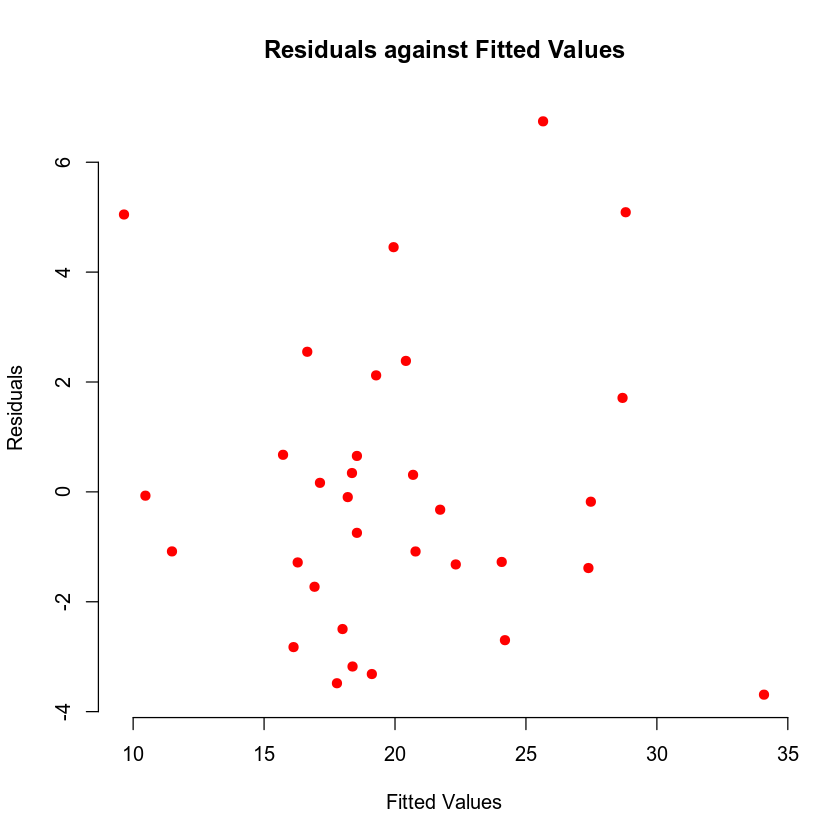

In [7]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="red", 
     pch = 19, frame = FALSE)

## Step 8: Diagnostic Plots  &mdash;  Q-Q Plot
In this step, you will generate a Q-Q plot to test assumptions of normality of the residuals.   

Click the block of code below and hit the **Run** button above.  
NOTE: If the plot is not created, click the code section and hit the **Run** button again.

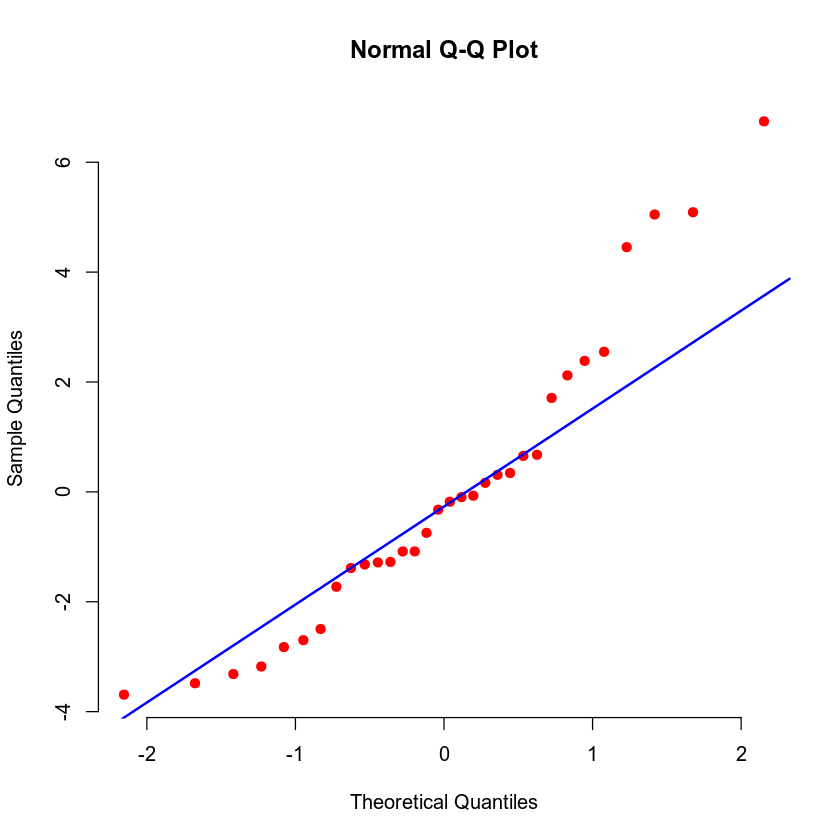

In [8]:
qqnorm(residuals, pch = 19, col="red", frame = FALSE)
qqline(residuals, col = "blue", lwd = 2)

## Step 9: Confidence Interval for Parameter Estimates
In this step, you will use the **confint** function to create 90% confidence intervals for the beta parameters.  

Click the block of code below and hit the **Run** button above.  

In [9]:
# confidence intervals for model parameters
print("confint")
conf_90_int <- confint(model2, level=0.90) 
round(conf_90_int, 4)

[1] "confint"


,5 %,95 %
(Intercept),-18.7488,25.2427
wt,-2.3414,10.6771
drat,3.5516,15.5725
am1,-4.1845,1.2564
wt:drat,-4.6004,-0.8164


## Step 10: Predictions, Prediction Interval, and Confidence Interval
In this step, you will predict the fuel economy for a car that has a weight of 3.88, a rear axle ratio of 3.05, and has a manual transmission. You will also obtain a 90% prediction interval and confidence interval for this prediction. Note that this observation is not from the dataset that was used to create this model. 

Click the block of code below and hit the **Run** button above.  

In [10]:
newdata <- data.frame(wt=3.88, drat=3.05, am='1')

print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval="predict", level=0.90) 
round(prediction_pred_int, 4)

print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval="confidence", level=0.90) 
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
15.0672,9.4501,20.6844


[1] "confidence interval"


fit,lwr,upr
15.0672,12.2316,17.9029


## Your Code

You have been asked to create regression models in the Module Two Problem Set. Review the Problem Set Report template to see the questions you will be answering about your models.

Use the empty blocks below to write the R code for your models and get outputs. Then use the outputs to answer the questions in your problem set report.

**Note: Use the + (plus) button to add new code blocks or the scissor icon to remove empty code blocks, if needed.**

## Model with Interaction Term
### Brandon Gibbs
### MAT 303 Applied Satistics STEM

In [11]:
# Loading mtcars data set from a mtcars.csv file
mtcars <- read.csv(file='mtcars.csv', header=TRUE, sep=",")

# Converting appropriate variables to factors  
mtcars2 <- within(mtcars, {
   vs <- factor(vs)
   am <- factor(am)
   cyl  <- factor(cyl)
   gear <- factor(gear)
   carb <- factor(carb)
})


# Print the first six rows
head(mtcars2, 6)

car,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<fct>,<dbl>,<fct>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [12]:
# Subsetting data to only include the variables that are needed for model 1 mpg, drat, hp, qsec
myvars <- c("mpg","hp","qsec", "drat")
mtcars_subset <- mtcars2[myvars]

# Print the first six rows
print("head")
head(mtcars_subset)

# Print the correlation matrix
print("correlation matrix for mpg, hp, drat & qsec")
corr_matrix <- cor(mtcars_subset, method = "pearson")
round(corr_matrix, 4)

[1] "head"


mpg,hp,qsec,drat
<dbl>,<int>,<dbl>,<dbl>
21.0,110,16.46,3.90
21.0,110,17.02,3.90
22.8,93,18.61,3.85
21.4,110,19.44,3.08
18.7,175,17.02,3.15
18.1,105,20.22,2.76


[1] "correlation matrix for mpg, hp, drat & qsec"


,mpg,hp,qsec,drat
mpg,1.0000,-0.7762,0.4187,0.6812
hp,-0.7762,1.0000,-0.7082,-0.4488
qsec,0.4187,-0.7082,1.0000,0.0912
drat,0.6812,-0.4488,0.0912,1.0000


The general form of this regression model equation is:
<br><br>
\begin{equation*}
E\left(y\right)=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3+\beta_4\left(x_1x_2\right)+\beta_5\left(x_1x_3\right)
\end{equation*}
<br><br>
The prediction regression model equation is:
<br><br>
\begin{equation*}
\hat{y} = \hat{{\beta}}_0 + \hat{{\beta}}_1x_1+ \hat{{\beta}}_2x_2+ \hat{{\beta}}_3x_3+ \hat{{\beta}}_4\left(x_1x_2\right)+ \hat{{\beta}}_5x\left(x_1x_3\right)
\end{equation*}
<br><br>

### Pearson Correlation Coefficients

#### Fuel Economy (mpg) and Horsepower (hp):

Correlation Coefficient: -0.7762

Interpretation: There is a strong negative correlation between fuel economy and horsepower. indicates that as horsepower increases, fuel economy tends to decrease.

#### Fuel Economy (mpg) and Quarter Mile Time (qsec):

Correlation Coefficient: 0.4187

Interpretation: There is a moderate positive correlation between fuel economy and quarter mile time. Suggests that cars with better fuel economy may have longer quarter mile times.

#### Fuel Economy (mpg) and Rear Axle Ratio (drat):

Correlation Coefficient: 0.6812

Interpretation: There is a strong positive correlation between fuel economy and rear axle ratio. Indicates that cars with higher rear axle ratios tend to have better fuel economy.

In [13]:
# Create the model for fuel economy (mpg) with horsepower (hp), quarter mile time (qsec), rear axle ratio (drat), and their interactions
model1 <- lm(mpg ~ hp + qsec + drat + hp:qsec + hp:drat, data=mtcars_subset)
summary(model1)


Call:
lm(formula = mpg ~ hp + qsec + drat + hp:qsec + hp:drat, data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2232 -1.8013 -0.8507  0.9860  8.1060 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -14.529137  16.136488  -0.900  0.37618   
hp            0.352800   0.130176   2.710  0.01175 * 
qsec          1.509555   0.699838   2.157  0.04043 * 
drat          5.666624   2.510466   2.257  0.03262 * 
hp:qsec      -0.018723   0.005735  -3.265  0.00307 **
hp:drat      -0.033246   0.018506  -1.796  0.08405 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.787 on 26 degrees of freedom
Multiple R-squared:  0.8207,	Adjusted R-squared:  0.7862 
F-statistic:  23.8 on 5 and 26 DF,  p-value: 6.098e-09


From the output, the prediction model equation is:
<br><br>
\begin{equation*}
\hat{Y} = -14.529137 + 0.352800x_1 + 1.509555x_2 + 5.666624x_3 - 0.018723(x_1x_2) - 0.033246(x_1x_3)
\end{equation*}
<br><br>

In [14]:
# predicted values
print("fitted")
fitted_values <- fitted.values(model1) 
fitted_values

[1] "fitted"


1        2        3        4        5        6        7        8 
23.06407 22.75610 23.88285 19.77734 16.66081 19.29297 15.20257 27.62318 
       9       10       11       12       13       14       15       16 
22.65669 20.53039 20.05438 15.62628 15.25417 14.50995 12.56048 12.04687 
      17       18       19       20       21       22       23       24 
11.50151 28.25495 33.15621 29.01892 22.59289 18.35518 18.06178 15.23705 
      25       26       27       28       29       30       31       32 
16.61840 28.09886 26.03300 22.29399 15.70254 19.27541 14.75895 22.44127

In [15]:
# residuals
print("residuals")
residuals <- residuals(model1)
residuals

[1] "residuals"


1           2           3           4           5           6 
-2.06407082 -1.75609654 -1.08285221  1.62266317  2.03919010 -1.19296678 
          7           8           9          10          11          12 
-0.90256758 -3.22318276  0.14331252 -1.33039292 -2.25438257  0.77372124 
         13          14          15          16          17          18 
 2.04583138  0.69005167 -2.16047799 -1.64687185  3.19848528  4.14504850 
         19          20          21          22          23          24 
-2.75620684  4.88107543 -1.09289393 -2.85517819 -2.86177641 -1.93705111 
         25          26          27          28          29          30 
 2.58160223 -0.79885727 -0.03300281  8.10601145  0.09746230  0.42459069 
         31          32 
 0.24105131 -1.04126868

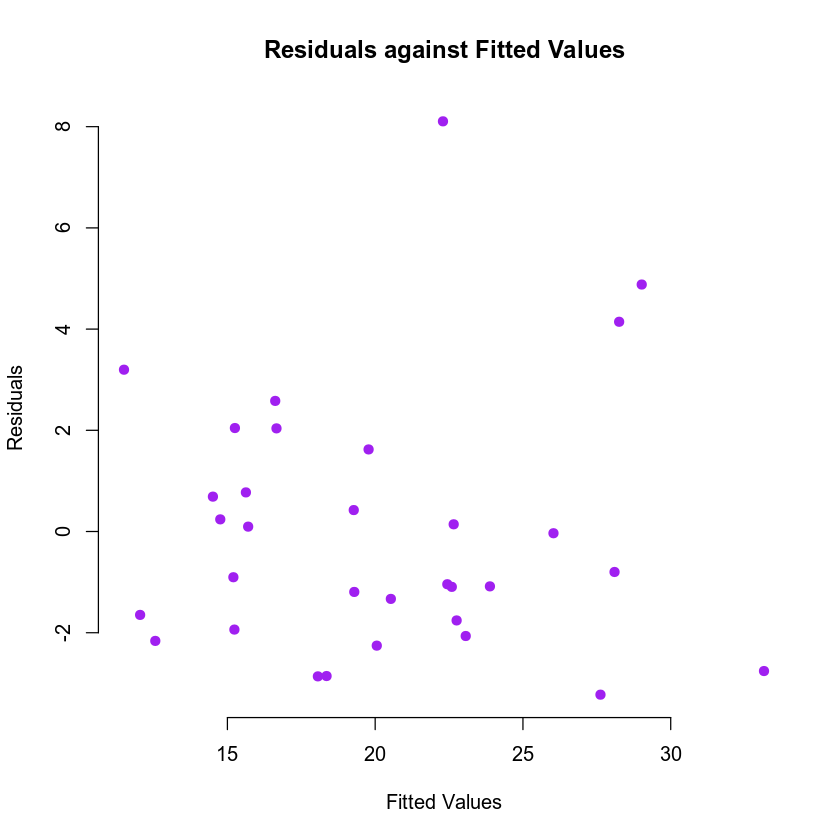

In [16]:
plot(fitted_values, residuals, 
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values", ylab = "Residuals",
     col="Purple", 
     pch = 19, frame = FALSE)

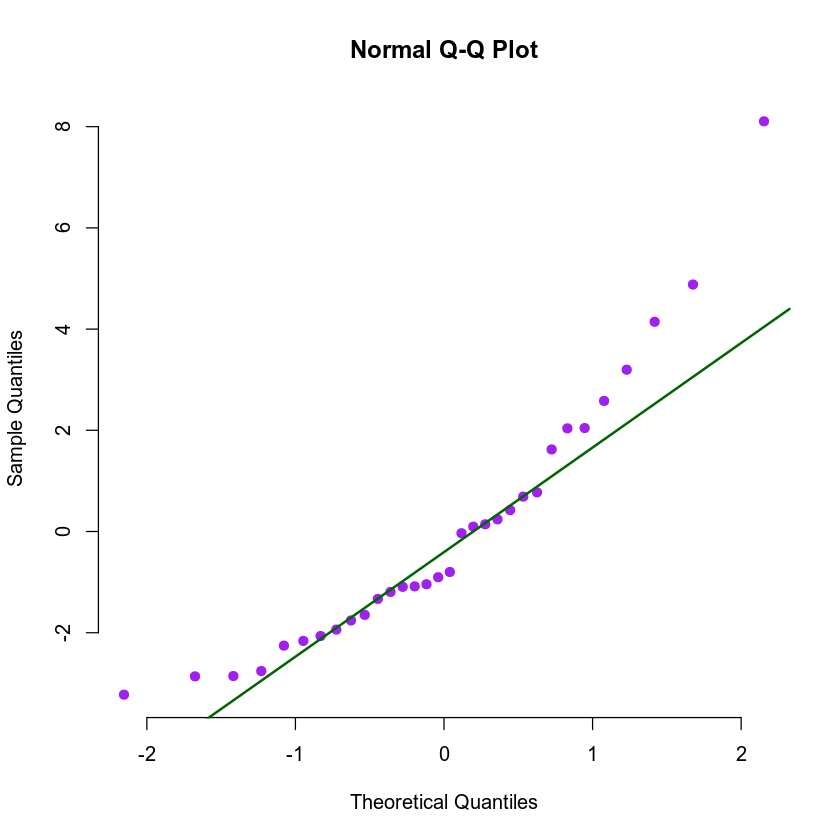

In [17]:
qqnorm(residuals, pch = 19, col="purple", frame = FALSE)
qqline(residuals, col = "dark green", lwd = 2)

In [18]:
# predictions with hypothetical values for model 1 variables
newdata <- data.frame(hp=175, qsec=14.2, drat=3.91)

print("prediction interval for model 1 hypothetical values")
prediction_pred_int <- predict(model1, newdata, interval="predict", level=0.95) 
round(prediction_pred_int, 4)

print("confidence interval for model 1 hypothetical values")
prediction_conf_int <- predict(model1, newdata, interval="confidence", level=0.95) 
round(prediction_conf_int, 4)

[1] "prediction interval for model 1 hypothetical values"


fit,lwr,upr
21.5285,15.0897,27.9674


[1] "confidence interval for model 1 hypothetical values"


fit,lwr,upr
21.5285,18.5881,24.469


In [19]:
myvars <- c("mpg","hp","qsec","drat", "cyl")
mtcars_subset <- mtcars2[myvars]

# Print the first six rows
print("head")
head(mtcars_subset, 6)


[1] "head"


mpg,hp,qsec,drat,cyl
<dbl>,<int>,<dbl>,<dbl>,<fct>
21.0,110,16.46,3.90,6
21.0,110,17.02,3.90,6
22.8,93,18.61,3.85,4
21.4,110,19.44,3.08,6
18.7,175,17.02,3.15,8
18.1,105,20.22,2.76,6


In [20]:
# Fit the regression model
model2 <- lm(mpg ~ hp + qsec + hp:qsec + factor(cyl), data=mtcars_subset)

# Summarize the model
summary(model2)


Call:
lm(formula = mpg ~ hp + qsec + hp:qsec + factor(cyl), data = mtcars_subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0004 -1.6264 -0.2424  1.3322  5.7974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  24.505565  13.186080   1.858   0.0745 .
hp            0.141850   0.079164   1.792   0.0848 .
qsec          0.531630   0.746717   0.712   0.4828  
factor(cyl)6 -4.408372   1.627676  -2.708   0.0118 *
factor(cyl)8 -4.580823   2.555742  -1.792   0.0847 .
hp:qsec      -0.012526   0.005251  -2.386   0.0246 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.692 on 26 degrees of freedom
Multiple R-squared:  0.8327,	Adjusted R-squared:  0.8005 
F-statistic: 25.88 on 5 and 26 DF,  p-value: 2.526e-09


In [21]:
# predicted values
print("fitted")
fitted_values <- fitted.values(model2) 
fitted_values

[1] "fitted"


1        2        3        4        5        6        7        8 
21.77136 21.29746 25.91176 19.24953 16.48751 19.14660 14.48728 28.40037 
       9       10       11       12       13       14       15       16 
22.90488 19.07832 18.47287 15.47600 15.13139 14.44215 12.39233 11.90446 
      17       18       19       20       21       22       23       24 
11.62371 28.12207 29.66431 28.10260 24.58993 18.47326 17.89392 15.57831 
      25       26       27       28       29       30       31       32 
16.43769 28.29028 27.25605 25.59785 17.13142 19.18385 13.94057 24.45989

In [22]:
# residuals
print("residuals")
residuals <- residuals(model2)
residuals

[1] "residuals"


1          2          3          4          5          6          7 
-0.7713623 -0.2974612 -3.1117607  2.1504687  2.2124918 -1.0466049 -0.1872770 
         8          9         10         11         12         13         14 
-4.0003668 -0.1048750  0.1216777 -0.6728667  0.9239955  2.1686127  0.7578472 
        15         16         17         18         19         20         21 
-1.9923311 -1.5044583  3.0762903  4.2779277  0.7356868  5.7973987 -3.0899334 
        22         23         24         25         26         27         28 
-2.9732577 -2.6939187 -2.2783115  2.7623055 -0.9902787 -1.2560518  4.8021458 
        29         30         31         32 
-1.3314220  0.5161487  1.0594334 -3.0598925

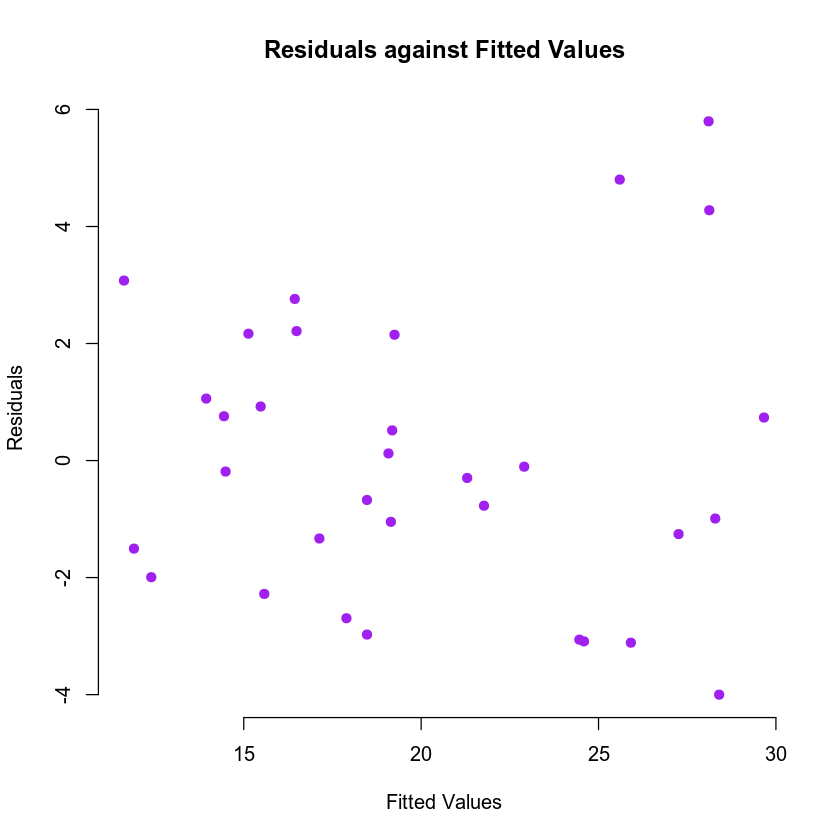

In [23]:
# Plot residuals against fitted values for model 2 
plot(fitted_values, residuals,
     main = "Residuals against Fitted Values",
     xlab = "Fitted Values",
     ylab = "Residuals", col = "Purple",
     pch = 19, frame = FALSE)

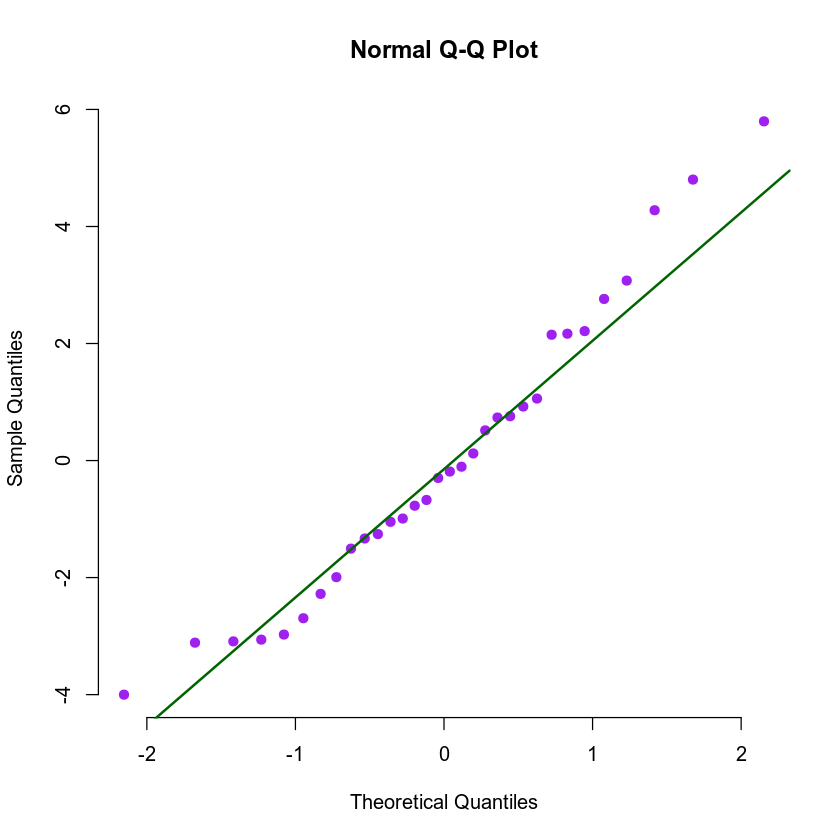

In [24]:
# Q-Q plot of residuals for model 2 
qqnorm(residuals, pch = 19, col = "purple", frame = FALSE) 
qqline(residuals, col = "dark green", lwd = 2)

In [25]:
# Predictions with hypothetical values for model 2 variables
newdata <- data.frame(hp = 175, qsec = 14.2, cyl = factor(6, levels = levels(mtcars2$cyl)))

# Prediction interval for model 2 hypothetical values
print("prediction interval")
prediction_pred_int <- predict(model2, newdata, interval = "predict", level = 0.95)
round(prediction_pred_int, 4)

# Confidence interval for model 2 hypothetical values
print("confidence interval")
prediction_conf_int <- predict(model2, newdata, interval = "confidence", level = 0.95)
round(prediction_conf_int, 4)

[1] "prediction interval"


fit,lwr,upr
21.3424,14.8764,27.8085


[1] "confidence interval"


fit,lwr,upr
21.3424,17.9965,24.6884


## End of Module Two Jupyter Notebook
Attach the HTML output along with your problem set report for the Module Two Problem Set. The HTML output can be downloaded by clicking **File**, then **Download as**, then **HTML**. Be sure to answer all of the questions in your problem set report.